# <center> <font style="color:rgb(100,109,254)">Age Detection</font> </center>

In this notebook we'll look at another type of classification problem, this time we'll be detecting the Age of a person. Now if you think about it you can't actually build an accurate age classifier. I mean we as humans have a really hard time guessing the exact age of a person so it stands to reason that a more logical step would be to guess age range of a person, we ourselves can predicts if someone is in his/her twenties, thirties or fourties. So we will be using an age range estimator algorithm that will predict a person's age range based on the face.

Ofcourse the first step for this would be Face detection, we will be using a ssd based face detector for detecting faces. Now In the past I have made a python library called **bleedfacedetector** which allows you to use 4 different face detection techniques of one of which is SSD based face detection. So I'll be using this library.

**You can install it like this:**

`pip install bleedfacedetector`

Note: Before you install this library, make sure you have opencv & dlib installed.

You can install dlib by doing:

`pip install dlib`

if this fails then do:

`pip install dlib==19.8.6`

You can learn more about bleedfacedetector [library here](https://github.com/TahaAnwar/bleedfacedetector).

In [1]:
# Import required packages.
import bleedfacedetector as fd
import cv2
import numpy as np
import time
import os
from tkinter import filedialog
from tkinter import Tk
import matplotlib.pyplot as plt

## <font style="color:rgb(134,19,348)"> Initializing the DNN module </font>

In [3]:
proto_file = "Media/M4/Model/age_deploy.prototxt"
weights = "Media/M4/Model/age_net.caffemodel"

net = cv2.dnn.readNet(weights, proto_file)

##  <font style="color:rgb(134,19,348)">Read Image</font> 


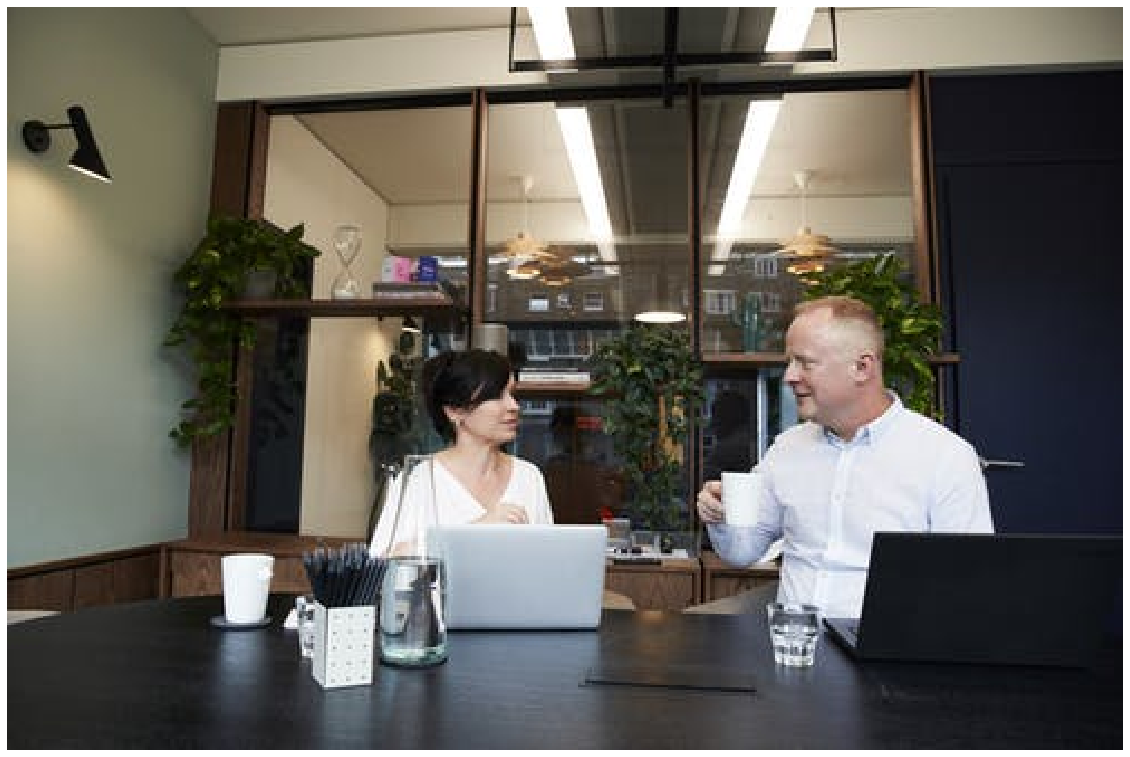

In [4]:
# Read image
image = cv2.imread("Media/M4/gender.jpeg")

# Display image
plt.figure(figsize=[20,20])
plt.imshow(image[:,:,::-1])
plt.axis('off');

**We'll be predicting among these Age Groups.**

In [17]:
# Define Age groups
Age_Groups = ['(0 - 2)', '(4 - 6)', '(8 - 12)', '(15 - 20)', '(25 - 32)', '(38 - 43)', '(48 - 53)', '(60 - 100)']

##  <font style="color:rgb(134,19,348)">Detect Faces with bleedfacedetector</font> 

Lets see the Age Detection Operation for a single face. Then we can apply the same procedure to multiple faces.

In [5]:
img_copy = image.copy()

# Use SSD detector with 20% confidence threshold.
faces = fd.ssd_detect(img_copy, conf=0.2)

# Check the number detected faces in image
print("{} faces detected".format(len(faces)))

# Lets take coordinates of the first face in the image. 
x,y,w,h = faces[0]

# Define padding for face roi
padding = 3

# extract the Face from image with padding.
face = img_copy[y-padding:y+h+padding,x-padding:x+w+padding] 

2 faces detected


##  <font style="color:rgb(134,19,348)"> Pre-processing the image  </font>

In [6]:
# Prepare the frame to be fed to the network
blob  = cv2.dnn.blobFromImage(face, 1, (227, 227), (78.4263377603, 87.7689143744, 114.895847746), swapRB=False)

## <font style="color:rgb(134,19,348)"> Input the Blob Image to the Network  </font>


In [7]:
net.setInput(blob)

##  <font style="color:rgb(134,19,348)">Forward Pass</font> 


In [14]:
%%time
output = net.forward()

Wall time: 28 ms


In [15]:
# The output are the probabilities for each age group
print('Shape of Output: {} \n'.format(output.shape))
print(output)

Shape of Output: (1, 8) 

[[2.8931589e-03 2.4557438e-02 1.0582704e-02 1.5321587e-03 9.4725299e-01
  9.0632392e-03 3.7273134e-03 3.9090024e-04]]


In [18]:
# Get the index of the max probability and that's your Age group
print('Predicted Age is :{}'.format(Age_Groups[output[0].argmax()]))

Predicted Age is :(25 - 32)


##  <font style="color:rgb(134,19,348)">Iterate the Process for all faces</font> 


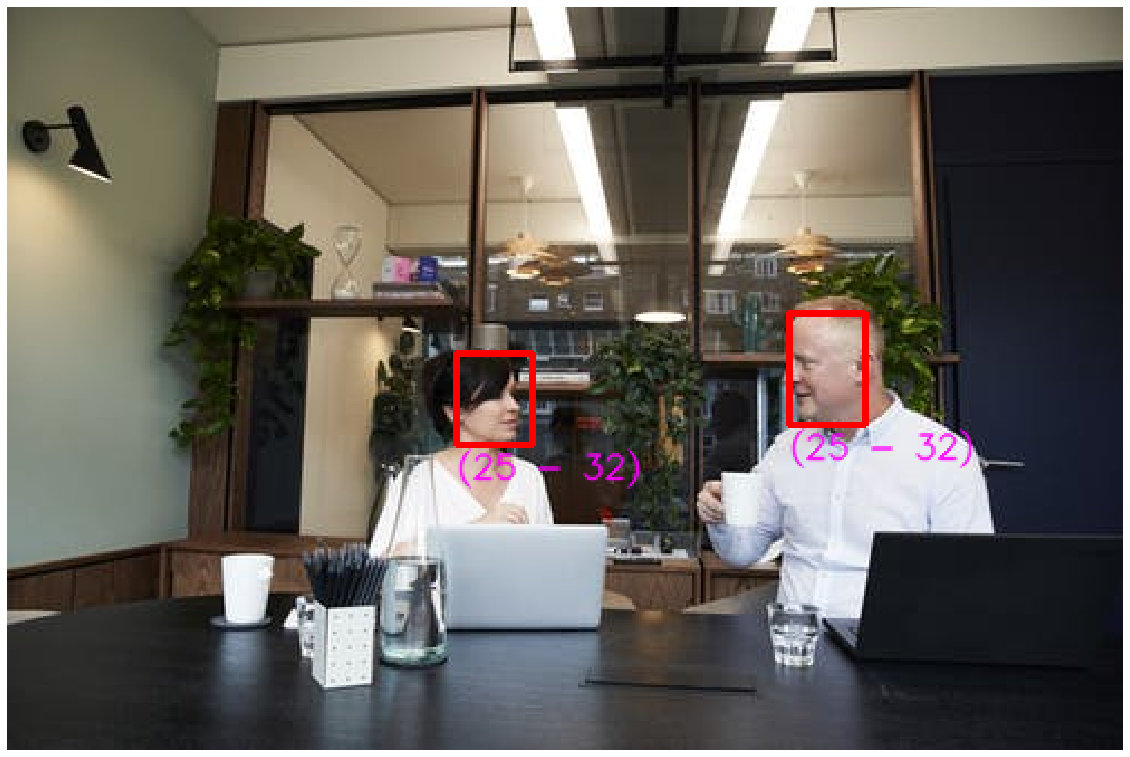

In [19]:
img_copy = image.copy()
padding = 10

# Iterate for each detected faces & apply the above process for each face.
for x,y,w,h in faces:
    
    # Padd the face
    face = img_copy[y-padding:y+h+padding,x-padding:x+w+padding]
    
    blob = cv2.dnn.blobFromImage(face, 1, (227, 227), (78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
    net.setInput(blob)
    
    # Perfrom the forward pass.
    output = net.forward()
    
    # Get the predicted age group.
    predicted_age = Age_Groups[output[0].argmax()]
    
    # Draw the bounding box around the face and put the age group.
    cv2.putText(img_copy,'{}'.format(predicted_age),(x,y+h+15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,255), 1, cv2.LINE_AA)
    cv2.rectangle(img_copy,(x,y),(x+w,y+h),(0,0,255),2)
    
plt.figure(figsize=(20,20))
plt.imshow(img_copy[:,:,::-1]);plt.axis("off");

## <font style="color:rgb(134,19,348)"> Creating Functions </font> 

## <font style="color:rgb(134,19,348)"> Initialization Function </font>

In [20]:
def init_detectage(usegpu = 'None',weights_name="age_net.caffemodel",proto_name="age_deploy.prototxt"):
    
    # Set global variables
    global net,Age_Groups
    
    # Defining base path
    base_path = 'Media/M4/Model'
    
    # Define Age groups
    Age_Groups = ['(0 - 2)', '(4 - 6)', '(8 - 12)', '(15 - 20)', '(25 - 32)', '(38 - 43)', '(48 - 53)', '(60 - 100)']
    
    # Defining model paths
    proto_file = os.path.join(base_path, proto_name)
    weights = os.path.join(base_path, weights_name) 
    
    # Initialize the DNN module
    net = cv2.dnn.readNet(weights,proto_file)
    
    # If specified use either cuda based Nvidia gpu or opencl based Intel gpu.   
    if usegpu == 'cuda':
        net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
        net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)
        
    elif usegpu == 'opencl':
        net.setPreferableTarget(cv2.dnn.DNN_TARGET_OPENCL)

## <font style="color:rgb(134,19,348)">  Main Function </font>

In [21]:
def detect_age(image=[], usercam=False, returndata=False, padding=3, size=0.75, face_conf = 0.4):
    
    # If the user did'nt specified the image then consider then consider choosing file or camera snapshot.
    if np.size(image) == 0:
        
        # If usercam cam is True then take picture from camera
        if usercam:
            cap=cv2.VideoCapture(0, cv2.CAP_DSHOW)
            ret, frame=cap.read()
            if ret:
                image= cv2.flip(frame,1)
                cap.release()
            else:
                print('Cant Open Camera')
                sys.exit()
                
        # Otherwise select image from computer using tkinter        
        else:
            root = Tk()
            root.filename =  filedialog.askopenfilename(title = "Pick up the Image")
            root.withdraw()
            image = cv2.imread(root.filename)
    
    # Detect faces
    faces = fd.ssd_detect(image, conf=face_conf)
    
    if len(faces) ==  0:
        return None
    
    for x,y,w,h in faces:
        
        # Fetech the face from image
        face = image[y-padding:y+h+padding,x-padding:x+w+padding]
        
        # Preprocessing of image
        blob = cv2.dnn.blobFromImage(face, 1, (227, 227), (78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
        
        # Forward in our dnn network 
        net.setInput(blob)
        
        # Predict gender
        output = net.forward()
        predicted_age = Age_Groups[output[0].argmax()]
        
        # Draw bounding box surrond the face and its person's gender 
        cv2.putText(image,'{}'.format(predicted_age),(x,y+h+15), cv2.FONT_HERSHEY_SIMPLEX, size, (255,0,255), 2, cv2.LINE_AA)
        cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)

            
    if  returndata:
        return image
    
    else:
        plt.figure(figsize=(10,10))
        plt.imshow(image[:,:,::-1]);plt.axis("off");          

**Initialize the Age Detector**

In [22]:
init_detectage()

**Calling Age Detector with default arguments.**

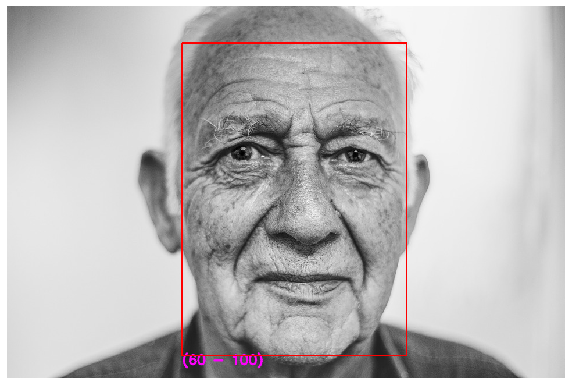

In [23]:
image = cv2.imread('Media/M4/oldman.jfif')
detect_age(image,face_conf = 0.99, padding=10)

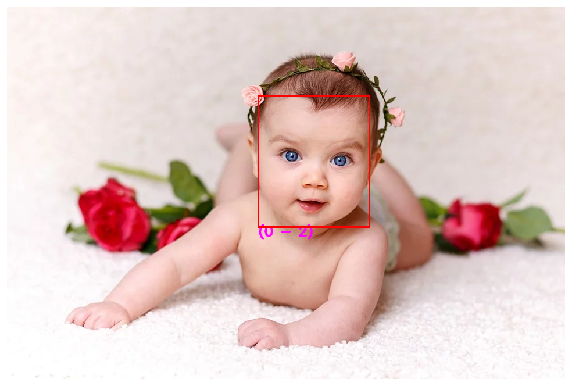

In [24]:
image = cv2.imread('Media/M4/baby.jpg')
detect_age(image)

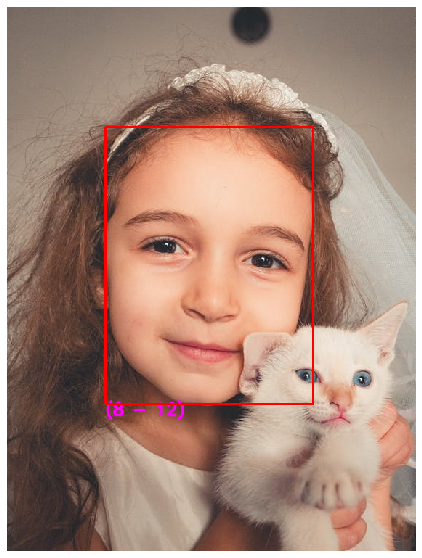

In [25]:
image = cv2.imread('Media/M4/girl_cat.jpeg')
detect_age(image,face_conf = 0.9)

####  Capturing Image from Camera

In [ ]:
detect_age(usercam=True, padding=6)

**Note:** Make sure the face has frontal view and that you tune the padding value for best results.

## <font style="color:rgb(134,19,348)"> Using Intel & Nvidia GPUs </font>

**CPU Time**

In [ ]:
init_detectage()

In [ ]:
%%time
image= detect_age(image = image, returndata=True)

**Intel GPU**

In [ ]:
init_detectage(usegpu = 'opencl')

In [ ]:
%%time
image= detect_age(image = image, returndata=True)

**NVIDIA GPU**

In [ ]:
init_detectage(usegpu = 'cuda')

In [ ]:
%%time
image= detect_age(image = image, returndata=True)

## <font style="color:rgb(134,19,348)"> Age detection with Live Webcam </font>

In [ ]:
fps=0
init_detectage()
cap=cv2.VideoCapture(0)

while(True):    
    
    start_time = time.time()
    ret,frame=cap.read() 
    image=cv2.flip(frame,1)
    
    image = detect_age(image,returndata=True)
    
    cv2.putText(image, 'FPS: {:.2f}'.format(fps), (400, 20), cv2.FONT_HERSHEY_SIMPLEX,0.8, (255, 20, 55), 2)
    cv2.imshow("Age Detection",image)
    
    k = cv2.waitKey(1)
    fps= (1.0 / (time.time() - start_time))
    
    if k == ord('q'):
        break
cap.release() 
cv2.destroyAllWindows() 